In [42]:
#step 1: import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [43]:
#step 2 : Load data set

data = pd.read_csv("bse_data.csv")

#display first row of the dataframe
print(data.head(5))

   number_siblings                   name  gender  age living_allowance  \
0                1     Nakasujja Gertrude  female   33              NaN   
1                3  Arinda Asiimwe Atweta  female   23           50,000   
2                4    Ndjekornom Victoire    male   23           25,000   
3                0         KATURAMU EDGAR    male   27          500,000   
4                4      Abinsinguza Lasse    male   24          100,000   

   have_bf_gf                profession  daily_meals  
0           1            Data Scientist            2  
1           1  Machine Learning Enginer            1  
2           0            Data Scientist            1  
3           0  Machine Learning Enginer            2  
4           1            Data Scientist            2  


In [44]:
# Step3: Data cleaning and pre-processing
"""
Things to look out for in data cleaning and pre-processing
1. Incosistent data types
2. Wrong data format
3. Duplicates
4. Missing values

"""
# 1. Check for incosistent data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   number_siblings   36 non-null     int64 
 1   name              36 non-null     object
 2   gender            36 non-null     object
 3   age               36 non-null     int64 
 4   living_allowance  29 non-null     object
 5   have_bf_gf        36 non-null     int64 
 6   profession        36 non-null     object
 7   daily_meals       36 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 2.4+ KB
None


In [45]:
# From the output above, all the values in the columns have similar data types depending on the column meaning
# there is no incosistent data type

# 2. Check for Wrong data format and solve it
# Depending on the output above, column living_allowance is of type string(object) yet it is supposed to be in  
# numeric format preferably float format for proper calculations.


# Convert living_allowance into a float format
# data["living_allowance"] = pd.to_numeric(data["living_allowance"], errors = "coerce").astype(float)

# We replace the comma first because if we dont, an error occurs as we convert the string (living_allowance ) to float, hence the 
# errors ="coerce" changes everything to NaN which we dont want because that is losing data to work with.

data["living_allowance"] = data["living_allowance"].replace([","], "", regex=True).astype(float)

#check if it worked
print(data.dtypes)

number_siblings       int64
name                 object
gender               object
age                   int64
living_allowance    float64
have_bf_gf            int64
profession           object
daily_meals           int64
dtype: object


In [46]:
# From the output above, we can see that living_allowance is now in float format
# Lets inspect our data again to see how it looks like

print(data)

    number_siblings                       name  gender  age  living_allowance  \
0                 1         Nakasujja Gertrude  female   33               NaN   
1                 3      Arinda Asiimwe Atweta  female   23          50000.00   
2                 4        Ndjekornom Victoire    male   23          25000.00   
3                 0             KATURAMU EDGAR    male   27         500000.00   
4                 4          Abinsinguza Lasse    male   24         100000.00   
5                 4        Beingana Jim Junior    male   20          10000.00   
6                 6   Cyiza Ndoli Jean de Dieu    male   23          60000.00   
7                 8        MUSIIMENTA CISSYLYN  female   20         260000.00   
8                 2           Nakanwagu Vanesa  female   23         250000.00   
9                 9                Otim Ronald    male   25               NaN   
10                1                  Levi Aine    male   24        1000000.00   
11                1         

In [47]:
#3. Check for duplicates and drop them if any exists
duplicates = data.duplicated()
print(f"Duplicated rows: {duplicates}")

Duplicated rows: 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
dtype: bool


In [48]:
# Show the number of duplicated rows
number_of_dupicates = data.duplicated().sum()
print(f"Number of duplicated rows : {number_of_dupicates}")

Number of duplicated rows : 0


In [49]:
# now that we have seen that we have no duplicates, we go to the last check
# 4. Check for missing values

missing_values = data.isnull() #have an overview
print(missing_values)

    number_siblings   name  gender    age  living_allowance  have_bf_gf  \
0             False  False   False  False              True       False   
1             False  False   False  False             False       False   
2             False  False   False  False             False       False   
3             False  False   False  False             False       False   
4             False  False   False  False             False       False   
5             False  False   False  False             False       False   
6             False  False   False  False             False       False   
7             False  False   False  False             False       False   
8             False  False   False  False             False       False   
9             False  False   False  False              True       False   
10            False  False   False  False             False       False   
11            False  False   False  False             False       False   
12            False  Fals

In [50]:

# check for missing values in a summerised way
number_of_missing_values = data.isnull().sum()
print(number_of_missing_values)

number_siblings     0
name                0
gender              0
age                 0
living_allowance    7
have_bf_gf          0
profession          0
daily_meals         0
dtype: int64


In [51]:
# From the output above, we can see that only the living_allowance column has missing values and we are going to fill them from here.

# Fill the missing values in living_allowances, with the average or mean value of the living allowance.

data["living_allowance"] = data["living_allowance"].fillna(data["living_allowance"].mean())

# Set pandas display options to show floats in standard decimal format
pd.options.display.float_format = '{:.2f}'.format

# see if it worked
print(data)


    number_siblings                       name  gender  age  living_allowance  \
0                 1         Nakasujja Gertrude  female   33         377310.34   
1                 3      Arinda Asiimwe Atweta  female   23          50000.00   
2                 4        Ndjekornom Victoire    male   23          25000.00   
3                 0             KATURAMU EDGAR    male   27         500000.00   
4                 4          Abinsinguza Lasse    male   24         100000.00   
5                 4        Beingana Jim Junior    male   20          10000.00   
6                 6   Cyiza Ndoli Jean de Dieu    male   23          60000.00   
7                 8        MUSIIMENTA CISSYLYN  female   20         260000.00   
8                 2           Nakanwagu Vanesa  female   23         250000.00   
9                 9                Otim Ronald    male   25         377310.34   
10                1                  Levi Aine    male   24        1000000.00   
11                1         

In [52]:
# Standardizing the proffession column to have the correct spelling of machine learning engineer

data["profession"] = data["profession"].replace(["Machine Learning Enginer"], "Machine Learning Engineer")

# check if it worked
print(data)

    number_siblings                       name  gender  age  living_allowance  \
0                 1         Nakasujja Gertrude  female   33         377310.34   
1                 3      Arinda Asiimwe Atweta  female   23          50000.00   
2                 4        Ndjekornom Victoire    male   23          25000.00   
3                 0             KATURAMU EDGAR    male   27         500000.00   
4                 4          Abinsinguza Lasse    male   24         100000.00   
5                 4        Beingana Jim Junior    male   20          10000.00   
6                 6   Cyiza Ndoli Jean de Dieu    male   23          60000.00   
7                 8        MUSIIMENTA CISSYLYN  female   20         260000.00   
8                 2           Nakanwagu Vanesa  female   23         250000.00   
9                 9                Otim Ronald    male   25         377310.34   
10                1                  Levi Aine    male   24        1000000.00   
11                1         

In [53]:
# DATA MANIPULATION AND MAKING CONCLUSIONS

# Now that our data set or dataframe is clean and pre-processed, we can do some amazing things with it such as making conclusions
# depending on the data we have, derive some information from the data.

# 1. Find out if there are more boys in relationships than girls or vice versa.

"""
Steps to follow
1. Group the data by gender
2. Select the relationship status column
3. Add them up to find out the number of males and females in a relationship
4. Make comparison
5.Do some visualisation

"""

'\nSteps to follow\n1. Group the data by gender\n2. Select the relationship status column\n3. Add them up to find out the number of males and females in a relationship\n4. Make comparison\n5.Do some visualisation\n\n'

In [54]:
#1. Group the data by gender
group_data_by_gender = data.groupby("gender")
# select the have_bf_gf column
group_data_by_gender = data.groupby("gender")["have_bf_gf"]
# Add the number of people in a relationship based on gender
group_data_by_gender = data.groupby("gender")["have_bf_gf"].sum()

print(group_data_by_gender)


gender
female    5
male      7
Name: have_bf_gf, dtype: int64


In [55]:
# Make comparisons and get the conclusion


if group_data_by_gender["female"] > group_data_by_gender["male"]:
    print("Conclusion: There are more girls in relationships than boys")
elif group_data_by_gender["female"] < group_data_by_gender["male"]:
    print("Conclusion: There are more boys in relationships than girls")
else:
    print("Conclusion: The number of boys and girls in relationships is equal")

Conclusion: There are more boys in relationships than girls


C:\Users\DELL\AppData\Local\Temp\ipykernel_11516\3926629204.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="gender", y="have_bf_gf", data=group_data_by_gender_df, palette="viridis")


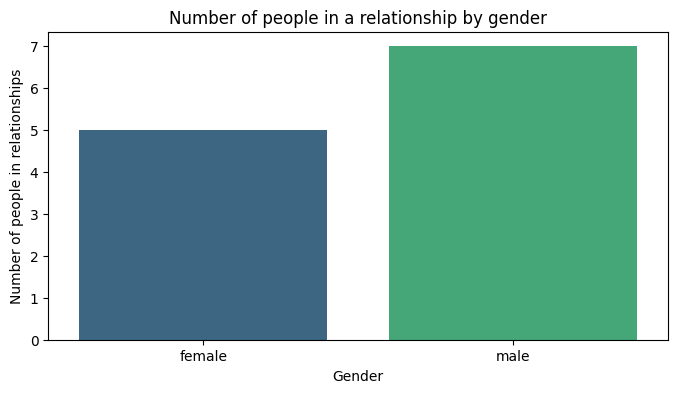

In [62]:
# VISUALISATIONS
# Do some visualisations
# plot the number of people in relations, sum against gender(plot for both genders)

#step 1: Change the group_data_by_gender serie into a data frame for easy plotting

group_data_by_gender_df = group_data_by_gender.reset_index()  #the gender index becomes a column

#step 2: plot the bar graph/plot using seaborn
plt.figure(figsize=(8,4))
sns.barplot(x="gender", y="have_bf_gf", data=group_data_by_gender_df, palette="viridis")

#step 3: Add titles and labels
plt.title("Number of people in a relationship by gender")
plt.xlabel("Gender")
plt.ylabel("Number of people in relationships")

#step 4: Display the plot or bar graph
plt.show()


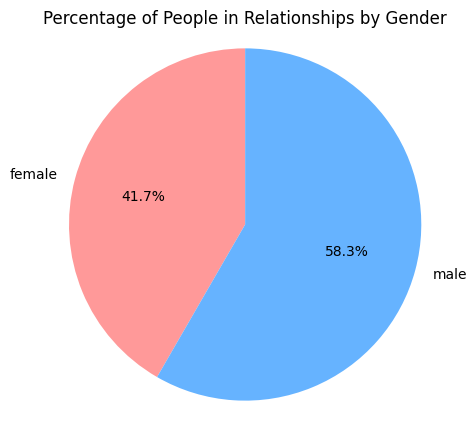

In [64]:
# plot a pie chart now
plt.figure(figsize=(5,5))
plt.pie(group_data_by_gender, labels= group_data_by_gender.index, autopct="%1.1f%%", colors=['#ff9999','#66b3ff'], startangle=90)

# set titles
plt.title('Percentage of People in Relationships by Gender')
plt.axis('equal')

# show the pie chart
plt.show()